# Genomic

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,precision_score,accuracy_score, recall_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the genomicMAtrix dataset

gene = pd.read_csv('miller2005_public_miller2005_genomicMatrix.gz', compression='gzip',delimiter="\t", header=0 )
gene.head()

,probe,X100B08,X101B88,X102B06,X103B41,X104B91,X105B13,X106B55,X10B88,X110B34,...,X85A03,X86A40,X87A79,X88A67,X8B87,X90A63,X94A16,X96A21,X99A50,X9B52
0,211050_x_at,-0.606098,-0.712117,-0.249024,0.473394,-0.549072,-0.309201,0.418973,-0.394657,-0.472516,...,0.194257,-0.014784,0.134075,-0.199902,0.118920,-0.379270,0.820076,-0.045577,-0.024553,0.270666
1,220399_at,0.297762,0.108554,0.529916,-0.023698,-0.240675,-0.186095,0.002805,-0.131806,0.113295,...,0.158997,0.228585,-1.618250,-0.237390,0.228423,-0.433717,-1.760925,0.290775,0.248707,-0.022792
2,202115_s_at,-0.020720,-0.329813,-0.455560,0.335867,0.091474,-0.064934,0.232192,-0.024533,0.390957,...,0.611860,0.303448,0.073593,-0.082835,0.133630,0.055395,0.071154,-0.114437,0.242833,0.218242
3,224501_at,0.019116,-0.508560,0.056202,-0.011279,0.189046,0.696562,0.192982,-0.319991,-0.243859,...,0.209864,0.215092,-0.323448,-0.020308,0.214315,0.212823,0.368002,0.207986,0.267993,0.791909
4,227347_x_at,0.217003,0.750269,0.469504,-0.182406,-0.472260,0.294003,0.147632,0.462857,0.781625,...,-0.792750,0.744523,0.156747,-0.060445,0.107039,-0.192824,0.030753,-0.463569,0.116094,-0.142529


In [3]:
## transpose the dataset to have the features as columns

new_gene = gene.set_index('probe').T.rename_axis('sampleID').reset_index()
new_gene

probe,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,216922_x_at,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.585269,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,0.343490,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-1.192292,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,0.233813,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.063716,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.206234,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,0.158520,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,-0.176975,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,-1.343960,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187


In [4]:
cl = pd.read_csv('miller2005_public_miller2005_public_clinicalMatrix.gz', compression='gzip',delimiter="\t", header=0 )
cl.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [5]:
DSS = cl[['sampleID', 'p53mutant']]
DSS

,sampleID,p53mutant
0,X100B08,p53-
1,X101B88,p53+
2,X102B06,p53+
3,X103B41,p53-
4,X104B91,p53+
...,...,...
246,X90A63,p53-
247,X94A16,p53-
248,X96A21,p53-
249,X99A50,p53+


In [6]:
merged =pd.merge(new_gene,DSS, on='sampleID')
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,p53mutant
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,p53-
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,p53+
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,p53+
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938,p53-
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,p53+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,p53-
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854,p53-
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,p53-
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,p53+


In [7]:
merged = merged.dropna(axis=0)
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,p53mutant
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,p53-
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,p53+
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,p53+
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938,p53-
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,p53+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,p53-
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854,p53-
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,p53-
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,p53+


In [8]:
## Add another column for High and low risk based on survival time

merged["p53mutant"] = np.where(merged["p53mutant"]=='p53+', 0, 1)
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,p53mutant
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,1
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,0
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938,1
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,1
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854,1
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,1
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,0


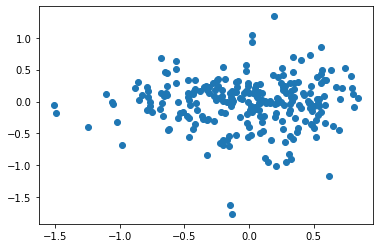

In [9]:
### plot 2 attributes to visualize the possible clusters:

plt.scatter(new_gene['212283_at'], new_gene['220399_at'])

In [10]:
## Features
features= merged.drop(["sampleID", "p53mutant"], axis=1)
target = merged["p53mutant"]

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [11]:
## K means clustering

km = KMeans(n_clusters = 2)
y_pred = km.fit_predict(features_std)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1])

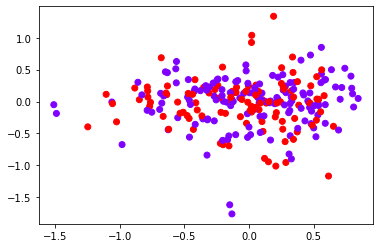

In [12]:
plt.scatter(merged['212283_at'], merged['220399_at'], c=km.labels_, 
cmap='rainbow') 

In [13]:
## Hierarchical Merging
hr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hr_pred = hr.fit_predict(features_std)

# Show cluster membership
hr_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

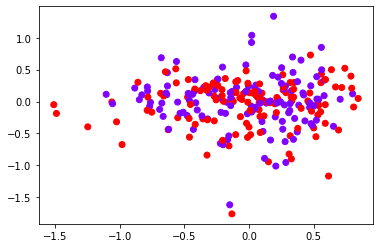

In [14]:
plt.scatter(merged['212283_at'], merged['220399_at'], c=hr.labels_, 
cmap='rainbow') 

In [15]:
km_ac = print('Accuracy = ', accuracy_score(target, y_pred))
hr_ac = print('Accuracy = ', accuracy_score(target, hr_pred))                             

Accuracy =  0.29880478087649404
Accuracy =  0.6653386454183267


In [16]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pc = pca.fit_transform(features_std)


In [17]:
km1 = KMeans(n_clusters = 2)
y1_pred = km1.fit_predict(pc)
y1_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0])

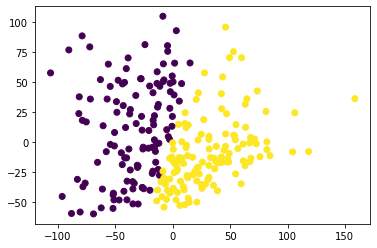

In [18]:
PCA_components = pd.DataFrame(pc)
km1.fit(PCA_components.iloc[:,:2])

labels = km1.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [19]:
hr1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hr1_pred = hr1.fit_predict(pc)

# Show cluster membership
hr1_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

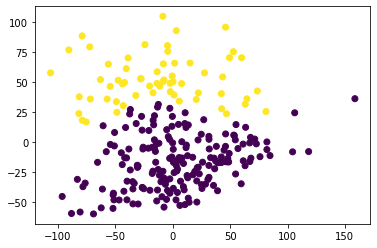

In [20]:
hr1.fit(PCA_components.iloc[:,:2])

labels = hr1.fit_predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [21]:
km1_ac = print('Accuracy = ', accuracy_score(target, y1_pred))
hr1_ac = print('Accuracy = ', accuracy_score(target, hr1_pred))               

Accuracy =  0.2788844621513944
Accuracy =  0.6215139442231076


In [22]:
## all attributes

algo = pd.DataFrame(index=["Accuracy"],
                   columns=["KMeans", "Hierarchical",])

algo.loc["Accuracy", "KMeans"] = accuracy_score(target, y_pred)
algo.loc["Accuracy", "Hierarchical"] = accuracy_score(target, hr_pred)

In [23]:
algo*100

,KMeans,Hierarchical
Accuracy,29.880478,66.533865


<AxesSubplot:>

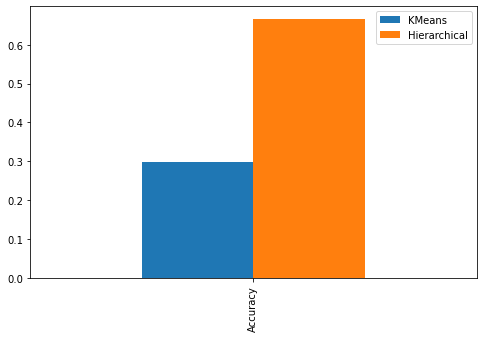

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
algo.plot(kind='bar', ax=ax)

In [25]:
algo = pd.DataFrame(index=["Accuracy"],
                   columns=["KMeans", "Hierarchical",])

algo.loc["Accuracy", "KMeans"] = accuracy_score(target, y1_pred)
algo.loc["Accuracy", "Hierarchical"] = accuracy_score(target, hr1_pred)

<AxesSubplot:>

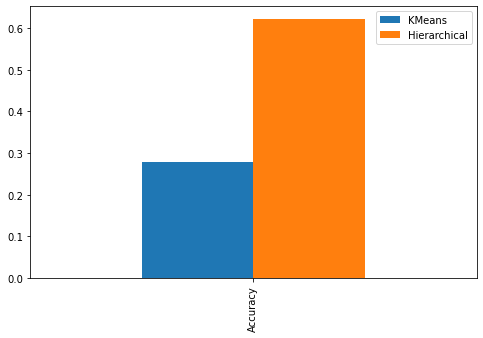

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
algo.plot(kind='bar', ax=ax)